#### Define a Feed Forward Neural Network (FFNN)

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from lib.models.recurrentNN import RNN

shape=[1, 1] 
n_hidden_states = 32
activation_fun=nn.Linear
activation_fun_hidden=nn.Tanh()

model = RNN(shape, n_hidden_states, activation_fun, activation_fun_hidden)

print(model)
if 0:
    for n, v in model.named_parameters():
        print(n)
        print(v)


RNN(
  (hidden_FFNN): FFNN(
    (afun_out): Tanh()
    (layers): ModuleList(
      (0): Linear(in_features=33, out_features=32, bias=True)
      (1): Tanh()
    )
  )
  (out_linear): Linear(in_features=32, out_features=1, bias=True)
)


#### Load Dataset

In [23]:
import torch
import numpy as np 
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

N = 100
N_train = int(0.8*N)

points = np.zeros((N, 3))
xx = np.linspace(0, 4*np.pi, N)
points[:,0] = xx 
points[:,1] = 1*np.sin(xx) + np.random.normal(0, 0.1, N)
points[:,2] = 1*np.sin(xx) 

if 0:
    plt.scatter(points[:,0], points[:,1])
    plt.show()


range_x = np.array([np.min(points[:,0]), np.max(points[:,0])])
#Extract columns and reshape to column vecotr
X = torch.tensor(points[:,0].reshape(N,1), dtype=torch.float32)
Y = torch.tensor(points[:,1].reshape(N,1), dtype=torch.float32)
Y_true = torch.tensor(points[:,2].reshape(N,1), dtype=torch.float32)


X_train = X[:N_train, :]
Y_train = Y[:N_train, :]
X_test = X[N_train:, :]
Y_test = Y[N_train:, :]



#### Train RNN

In [24]:
model = RNN(shape, n_hidden_states, activation_fun, activation_fun_hidden)# Initilize Model
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)
loss_function = nn.MSELoss() 

num_epochs = 500
num_steps = 10
max_grad_norm = 3
reg_Lambda = 0.

hidden_state, epoch_loss, train_loss = model.trainTBPTT(X, Y, num_epochs, optimizer, loss_function, num_steps, max_grad_norm, reg_Lambda)


#### Plot Results

Text(0, 0.5, 'loss')

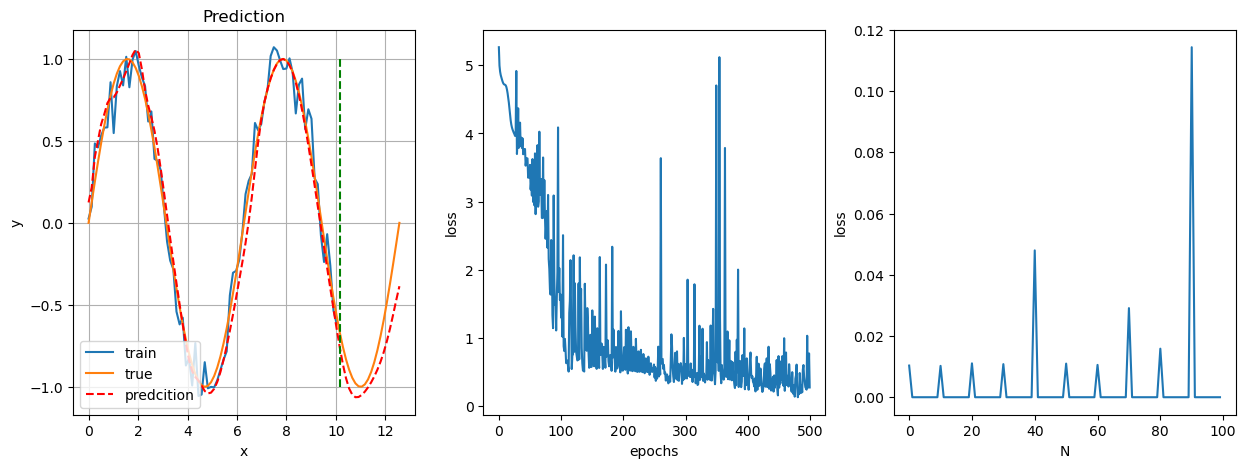

In [25]:
import matplotlib.pyplot as plt
import torch

if 1:
    y_pred,_ = model.predict(X, model.init_hidden())

else:
    y_pred,_ = model.predict(X_test, hidden_state)

y_pred = y_pred.data

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

# Learnign Curve
ax1.plot(X_train, Y_train, label='train')
#ax1.plot(X_test, Y_test, label='test')
ax1.plot(X, Y_true, label='true')
ax1.plot(X, y_pred,'r--', label='predcition')
ax1.vlines(X[N_train], -1, 1, colors='g', linestyles='dashed')

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Prediction')
ax1.legend(loc='lower left')
ax1.grid()
#plt.show()


ax2.plot(range(epoch_loss.shape[0]), epoch_loss)
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')

ax3.plot(range(train_loss.shape[0]), train_loss)
ax3.set_xlabel('N')
ax3.set_ylabel('loss')

